In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def get_score(valid_y_exp, pred):
    return mean_absolute_error(pred, valid_y_exp)

In [3]:
path = "Dataset/AAl_G_Weather_SkewFix_19des-22mar.csv"

df_data = pd.read_csv(path)

In [4]:
df_data['Year'] = pd.to_datetime(df_data['Recorded']).dt.year
df_data['Weekday'] = pd.to_datetime(df_data['Recorded']).dt.weekday
df_data['Hour'] = pd.to_datetime(df_data['Recorded']).dt.hour
df_data['Month'] = pd.to_datetime(df_data['Recorded']).dt.month
df_data['Day'] = pd.to_datetime(df_data['Recorded']).dt.day

In [18]:
#df_data = df_data.drop(columns=["wdir_cardinal","Recorded","SO2","CO",'heat_index', 'rh', 'pressure', 'wdir', 'wspd', 'Weekday',
#        'Hour', 'Month', 'Day', "Year"])

In [5]:
df_data = df_data.drop(columns=["wdir_cardinal","Recorded","SO2","CO","Month", "Day", "pressure"])

In [20]:
df_data.columns

Index(['NO2', 'NOx', 'heat_index', 'rh', 'wdir', 'wspd', 'Year', 'Weekday',
       'Hour'],
      dtype='object')

In [25]:
# df_data["NOx_max"]= df_data["NOx"].max()
# df_data["NOx_min"]= df_data["NOx"].min()
# df_data["NOx_mean"]= df_data["NOx"].mean()
# df_data["NO2_max"]= df_data["NO2"].max()
# df_data["NO2_min"]= df_data["NO2"].min()
# df_data["NO2_mean"]= df_data["NO2"].mean()
# df_data = df_data.reset_index(drop=True)

# for t in range(len(df_data)-1,-1,-1):
#     tmp1 = df_data.loc[t,"Weekday"]
#     for bt in range(t,-1,-1):
#         tmp2 = df_data.loc[bt,"Weekday"]
        
#         if bt==0:
#             bt=-1
#             break
#         elif tmp1 == tmp2:
#             # print(tmp1,tmp2)
#             continue
#         else:
#             # print(t,tmp1,bt,tmp2)
#             break
#     # print(t,tmp1,bt,tmp2)
#     df_data.loc[t,"NOx_max"]=df_data["NOx"].iloc[bt+1:t+1].max()
#     df_data.loc[t,"NOx_mean"]=df_data["NOx"].iloc[bt+1:t+1].mean()
#     df_data.loc[t,"NOx_min"]=df_data["NOx"].iloc[bt+1:t+1].min()
#     df_data.loc[t,"NO2_max"]=df_data["NO2"].iloc[bt+1:t+1].max()
#     df_data.loc[t,"NO2_mean"]=df_data["NO2"].iloc[bt+1:t+1].mean()
#     df_data.loc[t,"NO2_min"]=df_data["NO2"].iloc[bt+1:t+1].min()
# df_data = df_data[['NOx','NO2',"NOx_max","NOx_mean","NOx_min","NO2_max","NO2_mean",
#          ]].copy() 
# df_data.head(30)


,NOx,NO2,NOx_max,NOx_mean,NOx_min,NO2_max,NO2_mean
0,18.23,11.84,18.23,18.230000,18.23,11.84,11.840000
1,26.09,17.29,26.09,22.160000,18.23,17.29,14.565000
2,31.80,21.40,31.80,25.373333,18.23,21.40,16.843333
3,28.80,16.03,31.80,26.230000,18.23,21.40,16.640000
4,38.67,25.11,38.67,28.718000,18.23,25.11,18.334000
5,47.60,23.14,47.60,31.865000,18.23,25.11,19.135000
6,44.62,25.84,47.60,33.687143,18.23,25.84,20.092857
7,47.66,27.64,47.66,35.433750,18.23,27.64,21.036250
8,42.50,25.97,47.66,36.218889,18.23,27.64,21.584444
9,53.51,31.42,53.51,37.948000,18.23,31.42,22.568000


In [26]:
train_Df = df_data[0:35520]
train_Data = train_Df[0:28416]
val_df = train_Df[28416:]

In [27]:
X_train = train_Data[0:-1].copy()
Y_train = train_Data[["NO2","NOx"]].copy()
Y_train = Y_train[1:]

In [28]:
X_val = val_df[0:-1].copy()
Y_val = val_df[["NO2","NOx"]].copy()
Y_val = Y_val[1:]


In [29]:
Xscaler = StandardScaler()
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = StandardScaler()
Yscaler.fit(Y_train)
scaled_y_train = Yscaler.transform(Y_train)

In [30]:
X_val_scaler = StandardScaler() # scale so that all the X data will range from 0 to 1
X_val_scaler.fit(X_val)
scaled_X_val = X_val_scaler.transform(X_val)
Y_val_scaler = StandardScaler()
Y_val_scaler.fit(Y_val)
scaled_y_val = Y_val_scaler.transform(Y_val)

In [31]:
n_input = 1 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 256 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)
valgenerator = TimeseriesGenerator(scaled_X_val,scaled_y_val,length=n_input, batch_size=b_size)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 12)                960       
                                                                 
 dense_1 (Dense)             (None, 2)                 26        
                                                                 
Total params: 986
Trainable params: 986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
111/111 - 2s - loss: 0.6175 - val_loss: 0.5009 - 2s/epoch - 14ms/step
Epoch 2/1000
111/111 - 0s - loss: 0.4181 - val_loss: 0.4223 - 210ms/epoch - 2ms/step
Epoch 3/1000
111/111 - 0s - loss: 0.3618 - val_loss: 0.3781 - 201ms/epoch - 2ms/step
Epoch 4/1000
111/111 - 0s - loss: 0.3376 - val_loss: 0.3643 - 201ms/epoch - 2ms/step
Epoch 5/1000
111/111 - 0s - loss: 0.3298 - val_loss: 0.3572 - 213ms/epoch - 2ms/step
Epoch 6/1000
111/111 - 0s - l

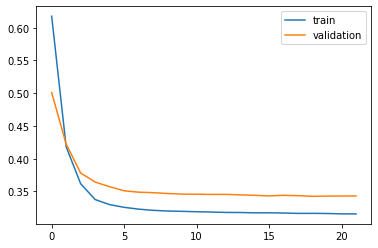

 Computing LSTM Feature importance...



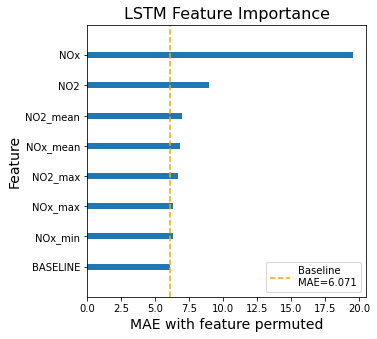

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

model = Sequential()
#model.add(Embedding(input_dim=48,output_dim=48))
model.add(LSTM(12,activation='tanh', input_shape=(n_input, n_features)))
# model.add(Dropout(0.1))
# model.add(Dense(30, activation='tanh'))
# model.add(Dropout(0.3))
model.add(Dense(2))
#model.add(tf.keras.layers.Reshape([48, 3]))
model.compile(loss='mae',optimizer='adam')
model.summary()

#model.fit(generator,epochs=5)
history = model.fit(generator, epochs=1000, shuffle=True,
                        validation_data=(valgenerator),
                        callbacks=[early_stopping],
                        verbose=2)


model.save("LSTM/LSTM_G_Model.h5")

#plot model accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

#plot feature importance
columnsTitles=train_Data.columns.to_list()
results = []
print(' Computing LSTM Feature importance...')
feature_preds_scale = model.predict(valgenerator, verbose = 0).squeeze()
feature_preds = Y_val_scaler.inverse_transform(feature_preds_scale)
baseline_mae = np.mean(np.abs(feature_preds - Y_val[:-1].values))
results.append({'feature': 'BASELINE', 'mae': baseline_mae})

for i in range(len(columnsTitles)):
    save_col = scaled_X_val[:,i].copy()
    np.random.shuffle(scaled_X_val[:,i])
    feature_preds_scale = model.predict(valgenerator, verbose = 0).squeeze()
    feature_preds = Y_val_scaler.inverse_transform(feature_preds_scale)
    mae = np.mean(np.abs(feature_preds - Y_val[:-1].values))
    results.append({'feature': columnsTitles[i], 'mae': mae})
    
    scaled_X_val[:,i] = save_col

print()
width = [0.2]
df = pd.DataFrame(results)
df = df.sort_values('mae')
plt.figure(figsize=(5,5))
plt.barh(np.arange(len(columnsTitles)+1),df.mae, width)
plt.yticks(np.arange(len(columnsTitles)+1),df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(columnsTitles)+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(columnsTitles)+1], '--', color='orange',
                    label=f'Baseline \nMAE={baseline_mae:.3f}')
plt.xlabel('MAE with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

In [28]:

prediction_scale = model.predict(valgenerator)
prediction = Y_val_scaler.inverse_transform(prediction_scale)
score = get_score(prediction,Y_val[:-1].values)
score_scale = get_score(prediction_scale,scaled_y_val[:-1])
print("val_loss Scaled:",score_scale)
print("val_loss normal:",score)


val_loss Scaled: 0.26714884820422896
val_loss normal: 5.772296192723303


In [33]:
real_df = df_data[35520: -6]
X_test = real_df.copy()
scaled_X_test = Xscaler.transform(X_test)
nplen = (X_test.shape[0],2)
npzeros = np.zeros(nplen)

In [34]:
test_generator = TimeseriesGenerator(scaled_X_test, npzeros, length=n_input, batch_size=b_size,reverse=True)

In [35]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [36]:
NO2_pred = [i[0] for i in y_pred]
NOx_pred = [i[1] for i in y_pred]

In [34]:
predictionsDf = pd.DataFrame({"Pred_NO2":NO2_pred,"Pred_NOx":NOx_pred})
predictionsDf = predictionsDf.round(2)
predictionsDf.to_csv("LSTM/AAl_G_Prediction.csv",index=False)

In [37]:
NO2_real =real_df["NO2"].values
NOx_real =real_df["NOx"].values

In [36]:
realDF = pd.DataFrame({"Real_NO2":NO2_real,"Real_NOx":NOx_real})
realDF.to_csv("LSTM/AAl_G_Real.csv",index=False)

In [38]:
scoreNO2 = get_score(NO2_real[1:],NO2_pred)
scoreNOx = get_score(NOx_real[1:],NOx_pred)
average = (scoreNO2 + scoreNOx) / 2
print('NOx score:', scoreNOx, '\n' 'NO2 score:', scoreNO2, '\n' 'Average MAE:', average)

NOx score: 6.413757467674633 
NO2 score: 2.8666654050401688 
Average MAE: 4.640211436357401


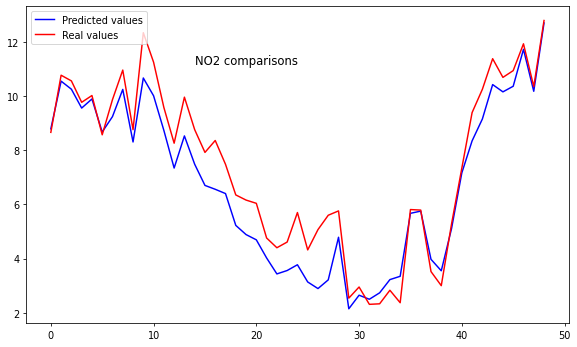

In [38]:

plt.figure(num=None, dpi=70, figsize=(10, 6),facecolor='w', edgecolor='k')
plt.plot(NO2_pred[0:48], "-b", label="Predicted values")
plt.plot(NO2_real[1:49], "-r", label="Real values")
plt.legend(loc="upper left")
plt.title('NO2 comparisons', x=0.5, y=0.8, loc='right')
plt.show()

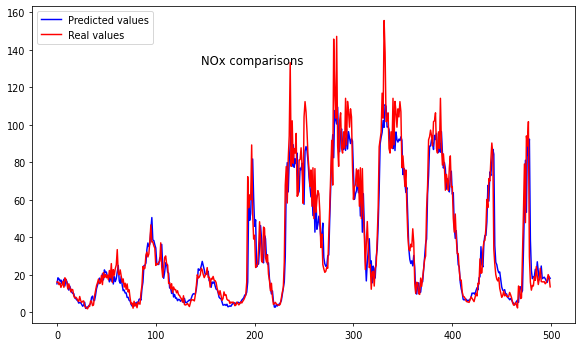

In [39]:
plt.figure(num=None, dpi=70, figsize=(10, 6),facecolor='w', edgecolor='k')
plt.plot(NOx_pred[0:500], "-b", label="Predicted values")
plt.plot(NOx_real[1:501], "-r", label="Real values")
plt.legend(loc="upper left")
plt.title('NOx comparisons', x=0.5, y=0.8, loc='right')
plt.show()